# 비타민 7기 복습 프로젝트 2조
---
- 김다희, 이준석, 조성택
- data : https://www.kaggle.com/vipin20/loan-application-data

## Data Load

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv('df1_loan.csv')
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


## Preprocessing
- 다희님께서 먼저 진행하셨던 내용을 참고해서 다음과 같이 진행해보았습니다.
    - 결측치 처리1 - 평균(수치형), 최빈값(범주형) 처리
    - 레이블인코딩, 원핫인코딩 비교
    - 이상치는 제거하지 않음
- 피처 스케일링
    - StandardScaler(SVM을 위해)

In [22]:
# input / output split + 불필요한 feature 삭제
X = df.drop(['Unnamed: 0', 'Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Total_Income float 변환, Credit_history object 변환
for i in range(len(X['Total_Income'])):
    X['Total_Income'][i] = X['Total_Income'][i].strip('$')
X = X.astype({'Total_Income':'float', 'Credit_History':'object'})

X.info()
X2 = X.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         488 non-null    object 
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         482 non-null    float64
 8   Loan_Amount_Term   486 non-null    float64
 9   Credit_History     459 non-null    object 
 10  Property_Area      500 non-null    object 
 11  Total_Income       500 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 47.0+ KB


In [23]:
from LoanClassificationPreprocessing import Preprocessing

pp = Preprocessing()

In [24]:
# 결측치 처리1 - 평균(수치형), 최빈값(범주형) 처리
X_label = pp.meanMode(X)
X_OneHot = pp.meanMode(X2)
# 인코딩1 - 레이블인코딩
X_label = pp.labelEncode(X_label)
# 인코딩2 - 원핫인코딩
X_OneHot = pp.oneHotEncode(X_OneHot)

In [25]:
X_OneHot.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,144.0,360.0,1.0,5849.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4583,1508.0,128.0,360.0,1.0,6091.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000,0.0,66.0,360.0,1.0,3000.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583,2358.0,120.0,360.0,1.0,4941.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,6000,0.0,141.0,360.0,1.0,6000.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
# 레이블인코딩 데이터 표준화
from sklearn.preprocessing import StandardScaler

num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label[num_col])
X_scaled_df = pd.DataFrame(data=X_scaled, columns=num_col)
X_label.drop(num_col, axis=1, inplace=True)
X_label = pd.concat([X_label, X_scaled_df], axis=1)
X_label.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
0,1,0,0,0,0,1.0,2,0.054593,-0.706425,-0.000248,0.277461,-0.174409
1,1,1,1,0,0,1.0,0,-0.139902,0.000794,-0.198353,0.277461,-0.137738
2,1,1,0,0,1,1.0,2,-0.383098,-0.706425,-0.966010,0.277461,-0.606131
3,1,1,0,1,0,1.0,2,-0.447162,0.399425,-0.297405,0.277461,-0.312003
4,1,0,0,0,0,1.0,2,0.077791,-0.706425,-0.037392,0.277461,-0.151527


In [27]:
# 원핫인코딩 데이터 표준화
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X_OneHot[num_col])
X_scaled_df = pd.DataFrame(data=X_scaled, columns=num_col)
X_OneHot.drop(num_col, axis=1, inplace=True)
X_OneHot = pd.concat([X_OneHot, X_scaled_df], axis=1)
X_OneHot.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.054593,-0.706425,-0.000248,0.277461,-0.174409
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,-0.139902,0.000794,-0.198353,0.277461,-0.137738
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-0.383098,-0.706425,-0.966010,0.277461,-0.606131
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.447162,0.399425,-0.297405,0.277461,-0.312003
4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.077791,-0.706425,-0.037392,0.277461,-0.151527


## Modeling - SVM
- 불균형 데이터 처리
    - Stratified K-fold (cross_val_score, cross_validate)
    - SMOTE

In [28]:
# 평가 지표 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
def get_clf_eval(y_test, pred=None, pred_proba=None):
    y_test = y_test.replace(to_replace={'Y':1, 'N':0})
    pred = pd.DataFrame(pred).replace(to_replace={'Y':1, 'N':0})
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('\n정확도: {0:.4f}\n정밀도: {1:.4f}\n재현율: {2:.4f}\nF1: {3:.4f}\nROC: {3:.4f}'.format(accuracy, precision, recall, f1, roc_score))

In [29]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y, test_size=0.2)
X_train_oneHot, X_test_oneHot, y_train_oneHot, y_test_oneHot = train_test_split(X_OneHot, y, test_size=0.2)

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#GridSearchCV를 통해 하이퍼파라미터 튜닝
param_grid = {
    "C": [0.01, 0.1, 1, 10, 25, 50, 100, 1000],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ['scale', 'auto', 0.1, 1, 10, 100]
}

svc_label = SVC()
grid_svc_label = GridSearchCV(svc_label, param_grid=param_grid, cv=4, n_jobs=-1, verbose=1)
grid_svc_label.fit(X_train_label, y_train_label)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 25, 50, 100, 1000],
                         'gamma': ['scale', 'auto', 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [32]:
print('final params : ', grid_svc_label.best_params_)
print('best score : ', grid_svc_label.best_score_)
print(grid_svc_label.score(X_test_label, y_test_label))

final params :  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
best score :  0.7999999999999999
0.85


In [34]:
print('레이블 인코딩 : 하이퍼 파라미터 튜닝 후 ')
get_clf_eval(y_test_label, grid_svc_label.predict(X_test_label))

레이블 인코딩 : 하이퍼 파라미터 튜닝 후 
오차 행렬
[[15 15]
 [ 0 70]]

정확도: 0.8500
정밀도: 0.8235
재현율: 1.0000
F1: 0.9032
ROC: 0.9032


In [35]:
svc_oneHot = SVC()
grid_svc_oneHot = GridSearchCV(svc_oneHot, param_grid=param_grid, cv=4, n_jobs=-1, verbose=1)
grid_svc_oneHot.fit(X_train_oneHot, y_train_oneHot)

print('final params : ', grid_svc_oneHot.best_params_)
print('best score : ', grid_svc_oneHot.best_score_)
print(grid_svc_oneHot.score(X_test_oneHot, y_test_oneHot))

Fitting 4 folds for each of 192 candidates, totalling 768 fits
final params :  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
best score :  0.8099999999999999
0.81


In [36]:
print('원핫 인코딩 : 하이퍼 파라미터 튜닝 후 ')
get_clf_eval(y_test_oneHot, grid_svc_oneHot.predict(X_test_oneHot))

원핫 인코딩 : 하이퍼 파라미터 튜닝 후 
오차 행렬
[[ 9 17]
 [ 2 72]]

정확도: 0.8100
정밀도: 0.8090
재현율: 0.9730
F1: 0.8834
ROC: 0.8834


### SMOTE 적용
- 하지만 역시 큰 차이가 없었음.

In [37]:
# SMOTE를 적용한 데이터 생성

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train_label, y_train_label)
print('SMOTE 전')
print(y_train_label.value_counts())
print('SMOTE 후')
print(y_train_over.value_counts())

SMOTE 전
Y    275
N    125
Name: Loan_Status, dtype: int64
SMOTE 후
N    275
Y    275
Name: Loan_Status, dtype: int64


In [39]:
smote_svc = grid_svc.best_estimator_
smote_svc.fit(X_train_over, y_train_over)

print('SMOTE 적용 후')
get_clf_eval(y_test, smote_svc.predict(X_test))

SMOTE 적용 후
오차 행렬
[[16 14]
 [ 1 69]]

정확도: 0.8500
정밀도: 0.8313
재현율: 0.9857
F1: 0.9020
ROC: 0.9020


### 나머지 하이퍼파라미터 튜닝
- 큰 차이 없음

In [38]:
rest_param_grid = {
    'shrinking': [True, False],
    'probability': [True, False],
    'decision_function_shape': ['ovo', 'ovr']
}
svc2 = grid_svc_label.best_estimator_
grid_svc2 = GridSearchCV(svc2, param_grid=rest_param_grid, cv=4, verbose=1, n_jobs=-1)
grid_svc2.fit(X_train_label, y_train_label)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=SVC(C=0.1, kernel='linear'), n_jobs=-1,
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'probability': [True, False],
                         'shrinking': [True, False]},
             verbose=1)

In [40]:
print('final params : ', grid_svc2.best_params_)
print('best score : ', grid_svc2.best_score_)
print(grid_svc2.score(X_test_label, y_test_label))

final params :  {'decision_function_shape': 'ovo', 'probability': True, 'shrinking': True}
best score :  0.7999999999999999
0.85


In [32]:
get_clf_eval(y_test, grid_svc2.predict(X_test))

오차 행렬
[[16 14]
 [ 1 69]]

정확도: 0.8500
정밀도: 0.8313
재현율: 0.9857
F1: 0.9020
ROC: 0.9020


In [42]:
# C 값을 더 세부적으로 나누어봤지만 큰 차이가 없음.
C_param_grid = {
    "C": np.arange(0.01, 0.21, 0.01)
}

svc3 = grid_svc2.best_estimator_
grid_svc3 = GridSearchCV(svc3, param_grid=C_param_grid, cv=4, verbose=1, n_jobs=-1)
grid_svc3.fit(X_train_label, y_train_label)

print(grid_svc3.best_params_)
get_clf_eval(y_test_label, grid_svc3.predict(X_test_label))

Fitting 4 folds for each of 20 candidates, totalling 80 fits
{'C': 0.04}
오차 행렬
[[15 15]
 [ 0 70]]

정확도: 0.8500
정밀도: 0.8235
재현율: 1.0000
F1: 0.9032
ROC: 0.9032


## Final Model

In [47]:
svc = SVC(
    C = 0.04,
    gamma =  'scale',
    kernel = 'linear',
    decision_function_shape = 'ovo',
    probability = True,
    shrinking = True
)
svc.fit(X_train_label, y_train_label)
pred = svc.predict(X_test_label)
pred_proba = svc.predict_proba(X_test_label)

In [46]:
get_clf_eval(y_test_label, pred)

오차 행렬
[[15 15]
 [ 0 70]]

정확도: 0.8500
정밀도: 0.8235
재현율: 1.0000
F1: 0.9032
ROC: 0.9032


## Precision & Recall

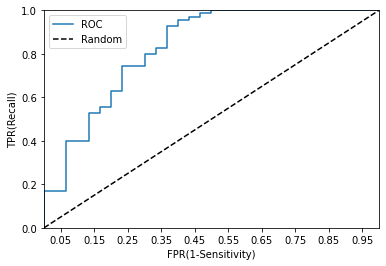

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_c1):
    y_test = y_test.replace(to_replace={'Y':1, 'N':0})
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test_label, pred_proba[:, 1])

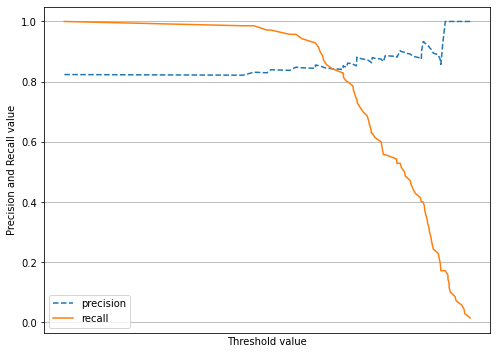

In [52]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    y_test = y_test.replace(to_replace={'Y':1, 'N':0})
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: thresholds_boundary], linestyle= '--', label='precision')
    plt.plot(thresholds, recalls[0: thresholds_boundary], label='recall')
    
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test_label, pred_proba[:,1])